<a href="https://colab.research.google.com/github/raihanivando/midterm-deep-learning/blob/main/Midterm_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gdown if not already installed
!pip install -U -q gdown

In [ ]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '18Q0DAlWETJW60Pe3fNwnneX5aOtvrkoK'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1DN3RXJkWNEbDSRhhDiFZ8L3L9OZ1m0mt clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1DN3RXJkWNEbDSRhhDiFZ8L3L9OZ1m0mt
To: /content/clustering /clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 50.3MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [ ]:
import pandas as pd

df = pd.read_csv('clustering /clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df_clean = df.drop(columns=['CUST_ID'])

In [ ]:
df_clean = df_clean.fillna(df_clean.median())


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_clean)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = scaled.shape[1]

# encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(16, activation='relu')(input_layer)
encoded = layers.Dense(8, activation='relu')(encoded)

# decoder
decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 17)             │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 857 (3.35 KB)

 Trainable params: 857 (3.35 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(scaled, scaled, epochs=30, batch_size=8, validation_split=0.2)


Epoch 1/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.7200 - val_loss: 0.2677
Epoch 2/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3187 - val_loss: 0.1913
Epoch 3/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2411 - val_loss: 0.1469
Epoch 4/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1652 - val_loss: 0.1124
Epoch 5/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1367 - val_loss: 0.0926
Epoch 6/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1137 - val_loss: 0.0732
Epoch 7/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1075 - val_loss: 0.0700
Epoch 8/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0905 - val_loss: 0.0607
Epoch 9/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0842 - val_loss: 0.0592
Epoch 10/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0790 - val_loss: 0.0564
Epoch 11/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0793 - val_loss: 0.0531
Epoch 12/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [ ]:
encoder = models.Model(inputs=input_layer, outputs=encoded)
latent_features = encoder.predict(scaled)


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
clusters_dl = kmeans.fit_predict(latent_features)
df['Cluster_DL'] = clusters_dl

In [ ]:
df['Cluster_DL']

,Cluster_DL
0,3
1,1
2,1
3,3
4,3
...,...
8945,0
8946,0
8947,0
8948,0


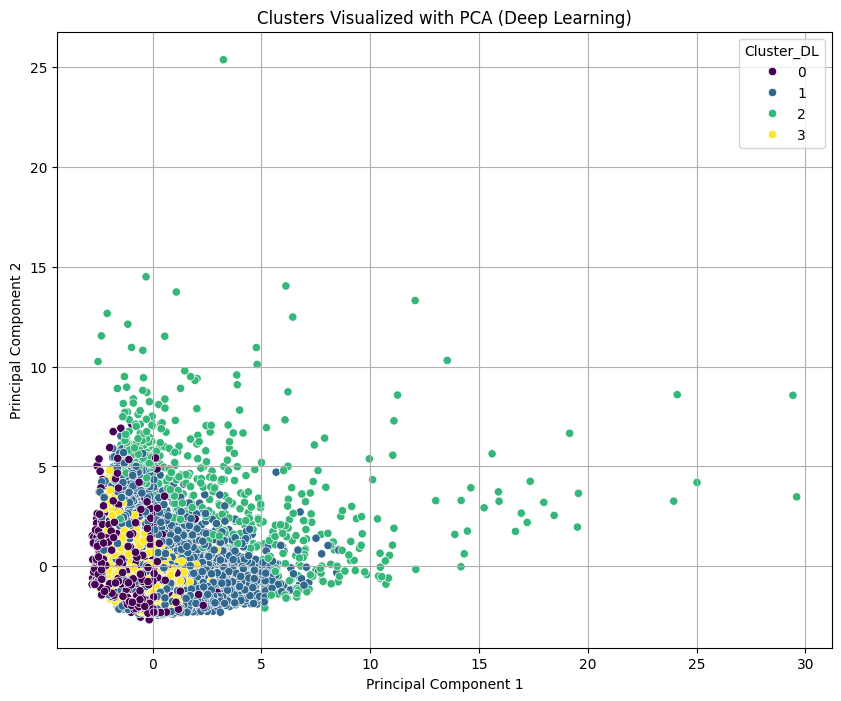

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster_DL'], palette='viridis', legend='full')
plt.title('Clusters Visualized with PCA (Deep Learning)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette = silhouette_score(latent_features, clusters_dl)

# Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(latent_features, clusters_dl)

# Calculate Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(latent_features, clusters_dl)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

Silhouette Score: 0.3143
Davies-Bouldin Score: 1.3668
Calinski-Harabasz Score: 3375.6870
